In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

### Load data: model predictions and true values

In [2]:
df = pd.DataFrame(columns=["wt_pdb","mut_pdb","pred_score","true_label"])

cutoff = "cutoff_90"
for fold in range(10):
    df = pd.concat([df, pd.read_csv(f"model_predictions/Graphinity_predictions_test-Foldx_ddG_942723-{cutoff}-fold{fold}.csv")])
    
assert df.shape[0] == 942723

### Plot

##### Figure 2b

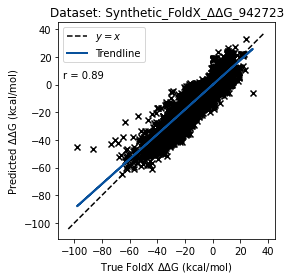

In [3]:
plt.scatter(df["true_label"],df["pred_score"],marker="x",color="k")
plt.xlabel("True FoldX $\Delta\Delta$G (kcal/mol)")
plt.ylabel("Predicted $\Delta\Delta$G (kcal/mol)")
# y=x line
lims = [
    np.min([plt.xlim(), plt.ylim()]),  # min of both axes
    np.max([plt.xlim(), plt.ylim()]),  # max of both axes
]
plt.plot(lims, lims, "k--", label="$y = x$")
# trendline
z = np.polyfit(df["true_label"],df["pred_score"],1)
p = np.poly1d(z)
plt.plot(df["true_label"],p(df["true_label"]), linestyle="-", color="#08519c", label="Trendline", linewidth=2)
# Pearson correlation on plot
plt.text(-93, 7,"r = %s" %format(pearsonr(df["true_label"],df["pred_score"])[0], ".2f"), ha="center", va="center")
plt.legend()
plt.axis("square")

ax = plt.gca()
ax.set_xticks(np.arange(-100,60,20))
ax.set_yticks(np.arange(-100,60,20))

plt.title("Dataset: Synthetic_FoldX_ΔΔG_942723")

plt.tight_layout()

plt.savefig("Figure-2b.png", dpi=300)

##### Figure 2d

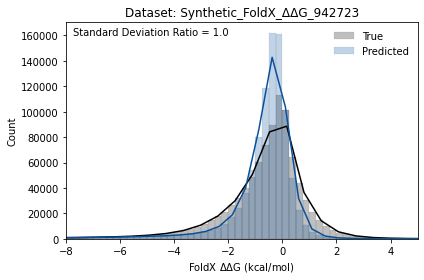

In [4]:
sns.histplot(df["true_label"], bins=np.arange(-90,25,0.25), kde=True, alpha=0.25,
             kde_kws={"bw_adjust":1.5}, color="k", label="True")
sns.histplot(df["pred_score"], bins=np.arange(-90,25,0.25), kde=True, alpha=0.25,
             kde_kws={"bw_adjust":1.5}, color="#08519c", label="Predicted")

plt.text(x=-7.75, y=160000, s=f"Standard Deviation Ratio = {round(df['pred_score'].std()/df['true_label'].std(), 2)}")

plt.xlim(-8,5)
plt.xlabel("FoldX $\Delta\Delta$G (kcal/mol)")
plt.ylabel("Count")
plt.legend(frameon=False)

plt.title("Dataset: Synthetic_FoldX_ΔΔG_942723")

plt.tight_layout()

plt.savefig("Figure-2d.png", dpi=300)